---
# Classic Algorithm

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

    def union(self, x, y):
        rootX = self.find(x)
        rootY = self.find(y)
        if rootX != rootY:
            if self.rank[rootX] > self.rank[rootY]:
                self.parent[rootY] = rootX
            elif self.rank[rootX] < self.rank[rootY]:
                self.parent[rootX] = rootY
            else:
                self.parent[rootY] = rootX
                self.rank[rootX] += 1
            return True
        return False

def kruskal_mst(V, edges):
    edges.sort()
    uf = UnionFind(V)
    mst_edges = []
    total_weight = 0

    for weight, u, v in edges:
        if uf.union(u, v):
            mst_edges.append((u, v, weight))
            total_weight += weight
        if len(mst_edges) == V - 1:
            break

    return total_weight, mst_edges

In [3]:
def visualize_mst(V, mst_edges, title="Minimum Spanning Tree"):
    G = nx.Graph()

    for u, v, weight in mst_edges:
        G.add_edge(u, v, weight=weight)

    pos = nx.spring_layout(G)

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='black', node_size=500, font_size=12, font_weight="bold")

    edge_labels = {(u, v): w for u, v, w in mst_edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color="red")

    plt.title(title)
    plt.show()


Test Case 1 (Total Weight: 4)
MST Edges: [(0, 1, 1), (2, 3, 1), (0, 2, 2)]


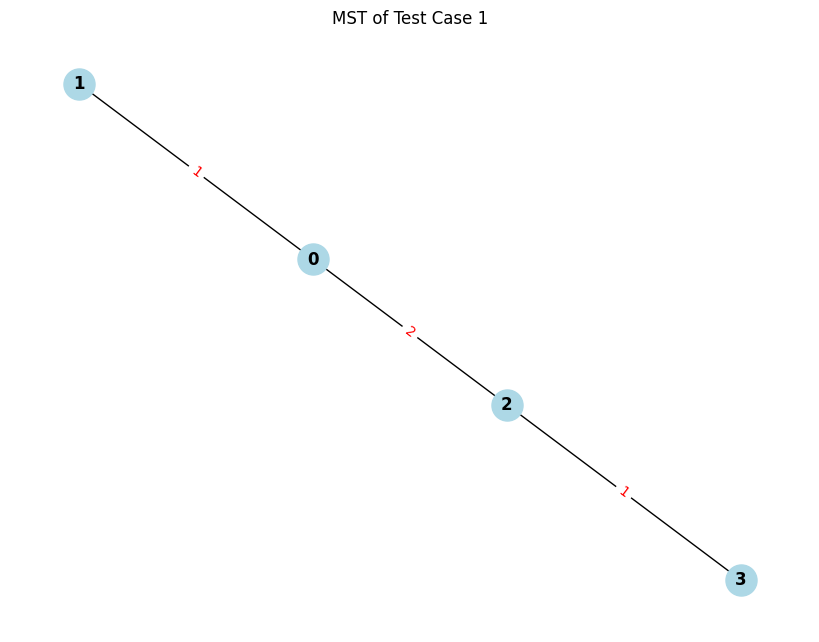

Test Case 2 (Total Weight: 8)
MST Edges: [(1, 3, 1), (1, 2, 2), (2, 4, 2), (0, 2, 3)]


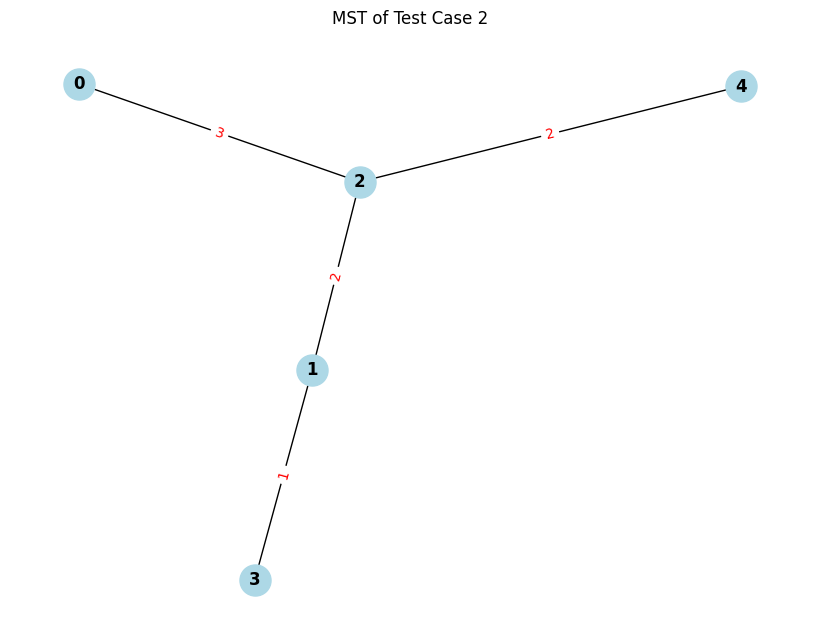

In [4]:
def test_mst():
    test_cases = [
        (4, [(1, 0, 1), (2, 1, 2), (1, 2, 3), (3, 3, 0), (2, 0, 2)]),
        (5, [(4, 0, 1), (3, 0, 2), (2, 1, 2), (1, 1, 3), (5, 2, 3), (6, 3, 4), (2, 2, 4)])
    ]

    for i, (V, edges) in enumerate(test_cases):
        total_weight, mst_edges = kruskal_mst(V, edges)
        print(f"Test Case {i+1} (Total Weight: {total_weight})")
        print("MST Edges:", mst_edges)
        visualize_mst(V, mst_edges, title=f"MST of Test Case {i+1}")

test_mst()


Test Case 1: Maximum Flow = 2


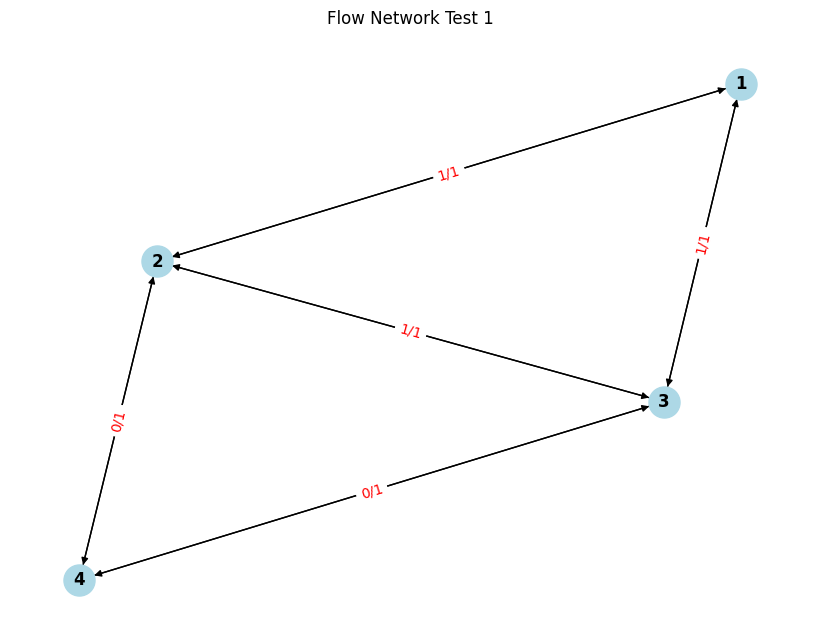

Test Case 2: Maximum Flow = 2


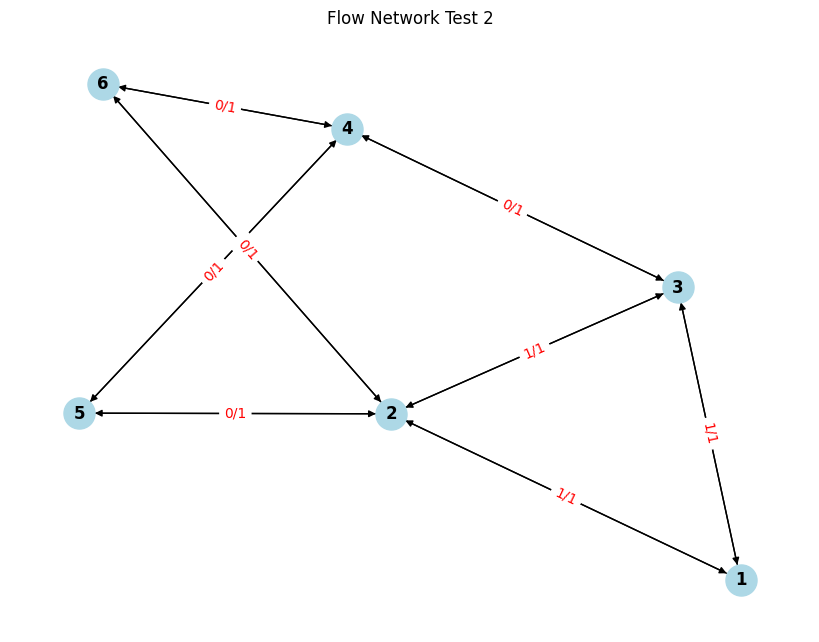

In [6]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque


def max_flow(N, edges):

    graph = [[] for _ in range(N)]
    flowable = [[0] * N for _ in range(N)]

    for n1, n2 in edges:
        graph[n1].append(n2)
        graph[n2].append(n1)
        flowable[n1][n2] += 1

    cnt = 0
    while True:
        dq = deque([0])
        visited = [-1] * N

        while dq:
            now_node = dq.popleft()
            if now_node == 1:
                break
            for next_node in graph[now_node]:
                if visited[next_node] < 0 and flowable[now_node][next_node] > 0:
                    visited[next_node] = now_node
                    dq.append(next_node)

        if visited[1] == -1:
            break

        cnt += 1
        cur = 1
        while cur != 0:
            prev = visited[cur]
            flowable[prev][cur] -= 1
            flowable[cur][prev] += 1
            cur = prev

    return cnt, flowable


def visualize_flow_network(N, edges, flowable, title="Network Flow"):
    G = nx.DiGraph()

    for n1, n2 in edges:
        capacity = 1
        flow = 1 - flowable[n1][n2]
        G.add_edge(n1 + 1, n2 + 1, capacity=capacity, flow=flow)
        G.add_edge(n2 + 1, n1 + 1, capacity=capacity, flow=flow)

    pos = nx.spring_layout(G)
    plt.figure(figsize=(8, 6))

    nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="black", node_size=500, font_size=12, font_weight="bold")

    edge_labels = {(u, v): f"{d['flow']}/{d['capacity']}" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color="red")

    plt.title(title)
    plt.show()


def test_cases():
    test_inputs = [
        (4, [(0, 1), (0, 2), (2, 1), (2, 3), (3, 1)]),
        (6, [(0, 1), (0, 2), (2, 1), (2, 3), (3, 4), (4, 1), (3, 5), (5, 1)])
    ]

    for i, (N, edges) in enumerate(test_inputs):
        max_flow_value, flowable = max_flow(N, edges)
        print(f"Test Case {i+1}: Maximum Flow = {max_flow_value}")
        visualize_flow_network(N, edges, flowable, title=f"Flow Network Test {i+1}")


test_cases()


---
# Quantum Graph

In [ ]:
import matplotlib.pyplot as plt
from IPython import display

import networkx as nx
import numpy as np
import pandas as pd
import time

from typing import List
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import ParameterVector
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer import AerSimulator

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def cycle_graph_c8():
    G = nx.cycle_graph(8)
    plt.figure(figsize=(6, 6))
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
    plt.title("Cycle Graph C8")
    plt.show()
    return G

# Path Graph P16
def path_graph_p16():
    G = nx.path_graph(16)
    plt.figure(figsize=(12, 2))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', edge_color='gray', node_size=300)
    plt.title("Path Graph P16")
    plt.show()
    return G

#-> Complete Bipartite Graph K8,8
def complete_bipartite_graph_k88():
    G = nx.complete_bipartite_graph(8, 8)
    plt.figure(figsize=(8, 6))
    pos = nx.bipartite_layout(G, nodes=range(8))
    nx.draw(G, pos, with_labels=True, node_color=['lightcoral'] * 8 + ['lightblue'] * 8,
            edge_color='gray', node_size=300)
    plt.title("Complete Bipartite Graph K8,8")
    plt.show()
    return G

#-> Complete Bipartite Graph K8,8
def complete_bipartite_graph_k_nn(n):
    G = nx.complete_bipartite_graph(n, n)
    plt.figure(figsize=(8, 6))
    pos = nx.bipartite_layout(G, nodes=range(n))
    nx.draw(G, pos, with_labels=True, node_color=['lightcoral'] * n + ['lightblue'] * n,
            edge_color='gray', node_size=300)
    plt.title("Complete Bipartite Graph K{},{}".format(n,n))
    plt.show()
    return G

# Star Graph S16
def star_graph_s16():
    G = nx.star_graph(16)
    plt.figure(figsize=(8, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='gold', edge_color='gray', node_size=300)
    plt.title("Star Graph S16")
    plt.show()
    return G

# Grid Graph 8x4
def grid_graph_8x4():
    G = nx.grid_graph(dim=[8, 4])
    plt.figure(figsize=(12, 6))
    pos = {node: node for node in G.nodes()}
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=300)
    plt.title("Grid Graph 8x4")
    plt.show()
    return G

# Grid Graph 8x4
def grid_graph_nxm(n,m):
    G = nx.grid_graph(dim=[n, m])
    plt.figure(figsize=(12, 6))
    pos = {node: node for node in G.nodes()}
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=300)
    plt.title("Grid Graph {}x{}".format(n,m))
    plt.show()
    return G


#-> 4-Regular Graph with 8 Vertices
def regular_graph_4_8():
    G = nx.random_regular_graph(d=4, n=8, seed=42)
    plt.figure(figsize=(6, 6))
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightgreen', edge_color='gray', node_size=500)
    plt.title("4-Regular Graph with 8 Vertices")
    plt.show()
    return G

#-> Cubic (3-Regular) Graph with 16 Vertices
def cubic_graph_3_16():
    G = nx.random_regular_graph(d=3, n=16, seed=42)
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightcoral', edge_color='gray', node_size=300)
    plt.title("Cubic (3-Regular) Graph with 16 Vertices")
    plt.show()
    return G

# Disjoint Union of Four C4 Cycles
def disjoint_union_c4():
    cycles = [nx.cycle_graph(4) for _ in range(4)]
    G = nx.disjoint_union_all(cycles)
    plt.figure(figsize=(12, 6))
    pos = {}
    shift_x = 0
    for component in nx.connected_components(G):
        subgraph = G.subgraph(component)
        pos_sub = nx.circular_layout(subgraph, scale=1, center=(shift_x, 0))
        pos.update(pos_sub)
        shift_x += 3
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=300)
    plt.title("Disjoint Union of Four C4 Cycles")
    plt.show()
    return G

# Complete Bipartite Graph K16,16
def complete_bipartite_graph_k1616():
    G = nx.complete_bipartite_graph(16, 16)
    plt.figure(figsize=(12, 6))
    pos = nx.bipartite_layout(G, nodes=range(16))
    nx.draw(G, pos, with_labels=False, node_color=['lightcoral'] * 16 + ['lightblue'] * 16,
            edge_color='gray', node_size=100)
    plt.title("Complete Bipartite Graph K16,16")
    plt.show()
    return G

# 5-Dimensional Hypercube Graph Q5
def hypercube_graph_q5():
    G = nx.hypercube_graph(5)
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=False, node_color='lightgreen', edge_color='gray', node_size=200)
    plt.title("5-Dimensional Hypercube Graph Q5")
    plt.show()
    return G

# Tree Graph with 8 Vertices
def tree_graph_8():
    G = nx.balanced_tree(r=2, h=2)
    G.add_edge(6, 7)
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=300)
    plt.title("Tree Graph with 8 Vertices")
    plt.show()
    return G

# Wheel Graph W16
def wheel_graph_w16():
    G = nx.wheel_graph(16)
    plt.figure(figsize=(8, 8))
    pos = nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightcoral', edge_color='gray', node_size=300)
    plt.title("Wheel Graph W16")
    plt.show()
    return G

#-> Random Connected Graph with 16 Vertices
def random_connected_graph_16(p=0.15):
    #n, p = 16, 0.25
    n=16
    while True:
        G = nx.erdos_renyi_graph(n, p, seed=random.randint(1, 10000))
        if nx.is_connected(G):
            break
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=False, node_color='lightgreen', edge_color='gray', node_size=100)
    plt.title("Random Connected Graph with 16 Vertices")
    plt.show()
    return G

# Expander Graph with 32 Vertices
def expander_graph_32():
    G = nx.random_regular_graph(4, 32, seed=42)
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=False, node_color='lightblue', edge_color='gray', node_size=100)
    plt.title("Expander Graph with 32 Vertices")
    plt.show()
    return G

#-> Expander Graph with n Vertices
def expander_graph_n(n):
    G = nx.random_regular_graph(4, n, seed=42)
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=False, node_color='lightblue', edge_color='gray', node_size=100)
    plt.title("Expander Graph with {} Vertices".format(n))
    plt.show()
    return G

# Planar Connected Graph with 16 Vertices
def planar_connected_graph_16():
    G = nx.grid_graph(dim=[8, 2])
    G = nx.convert_node_labels_to_integers(G)
    additional_edges = [(0, 9), (1, 10), (2, 11), (3, 12), (4, 13), (5, 14), (6, 15),
                        (7, 15), (8, 7)]#, (6, 15), (14, 1), (1, 13), (10, 9), (0, 10), (12, 2), (8, 7)]
    G.add_edges_from([e for e in additional_edges if e[0] < 16 and e[1] < 16])
    assert nx.check_planarity(G)[0], "Graph is not planar."
    pos = {node: (node // 2, node % 2) for node in G.nodes()}
    plt.figure(figsize=(16, 8))
    nx.draw(G, pos, with_labels=False, node_color='lightcoral', edge_color='gray', node_size=100)
    plt.title("Planar Connected Graph with 16 Vertices")
    plt.axis('equal')
    plt.show()
    return G

In [ ]:
%%capture
!pip install cv2

In [ ]:
graph = graph4
graph

In [ ]:
def build_ansatz(graph: nx.Graph) -> QuantumCircuit:

    ansatz = QuantumCircuit(graph.number_of_nodes())
    ansatz.h(range(graph.number_of_nodes()))

    theta = ParameterVector(r"$\theta$", graph.number_of_edges())
    for t, (u, v) in zip(theta, graph.edges):
        ansatz.cx(u, v)
        ansatz.ry(t, v)
        ansatz.cx(u, v)

    return ansatz

In [ ]:
# alternate method to make the ansatz

# function to generate a maximum spanning tree of the graph
def generate_max_spanning_tree(G):
    # for u, v in G.edges:
    #     G[u][v]['weight'] *= -1
    return nx.minimum_spanning_tree(G, algorithm='kruskal')

# function to return the graph with the spanning tree edges removed
def remove_spanning_tree_edges(G, T):
    H = G.copy()
    for edge in T.edges:
        H.remove_edge(*edge)
    return H

Text(0.5, 1.0, 'Graph with Maximum Spanning Tree')

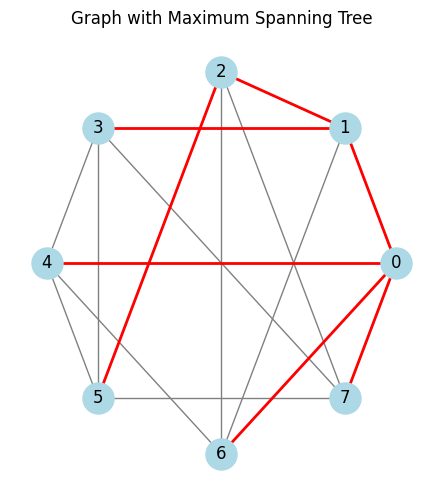

In [ ]:
# get the maximum spanning tree of the graph by negating all the edge weights and calculating the MST
T = generate_max_spanning_tree(graph)

# remove the edges of the spanning tree from the graph
H = remove_spanning_tree_edges(graph, T)

# visualize the tree and the graph with the tree edges removed
plt.figure(figsize=(12, 6))
plt.subplot(121)
pos = nx.circular_layout(graph)
nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
nx.draw_networkx_edges(T, pos, edge_color='red', width=2)
plt.title("Graph with Maximum Spanning Tree")

In [ ]:
!pip install matplotlib ipython networkx numpy pandas qiskit qiskit-aer

In [ ]:
%%capture
!pip install matplotlib ipython networkx numpy pandas qiskit qiskit-aer

---
# Quantum Circuit

In [ ]:
# build the ansatz circuit for both T and H
ansatz_T = build_ansatz(T)
ansatz_H = build_ansatz(H)

In [5]:
%%capture
!pip install qiskit

In [ ]:
from qiskit.visualization import matplotlib as mpl


In [ ]:
from qiskit.visualization import circuit_drawer

circuit_drawer(ansatz_T, output="text")  # "mpl", "latex", "latex_source" 등 변경 가능


┌──────────┐┌──────────┐                                          »
q_0: ┤ Rx(θ[0]) ├┤ Ry(θ[0]) ├─■────────────────────────────────────────»
     └──────────┘└──────────┘ │ ┌──────────┐┌──────────┐               »
q_1: ─────────────────────────■─┤ Rx(θ[1]) ├┤ Ry(θ[1]) ├─■─────────────»
                                └──────────┘└──────────┘ │ ┌──────────┐»
q_2: ────────────────────────────────────────────────────■─┤ Rx(θ[2]) ├»
                                                           └──────────┘»
q_3: ──────────────────────────────────────────────────────────────────»
                                                                       »
«                                            
«q_0: ───────────────────────────────────────
«                                            
«q_1: ───────────────────────────────────────
«     ┌──────────┐                           
«q_2: ┤ Ry(θ[2]) ├─■─────────────────────────
«     └──────────┘ │ ┌──────────┐┌──────────┐
«q_3: ─────────────■─┤ Rx(θ[3]) ├┤ Ry(θ[3]) ├
«                    └──────────┘└──────────┘

In [ ]:
def build_maxcut_hamiltonian(graph: nx.Graph) -> SparsePauliOp:
    """
    Build the MaxCut Hamiltonian for the given graph H = (|E|/2)*I - (1/2)*Σ_{(i,j)∈E}(Z_i Z_j)
    """
    num_qubits = len(graph.nodes)
    edges = list(graph.edges())
    num_edges = len(edges)

    pauli_terms = ["I"*num_qubits] # start with identity
    coeffs = [-num_edges / 2]

    for (u, v) in edges: # for each edge, add -(1/2)*Z_i Z_j
        z_term = ["I"] * num_qubits
        z_term[u] = "Z"
        z_term[v] = "Z"
        pauli_terms.append("".join(z_term))
        coeffs.append(0.5)

    return SparsePauliOp.from_list(list(zip(pauli_terms, coeffs)))

In [ ]:
def build_maxcut_hamiltonian_part2(graph: nx.Graph) -> SparsePauliOp:
    num_qubits = len(graph.nodes)
    edges = list(graph.edges())
    num_edges = len(edges)
    nodes = list(graph.nodes())

    pauli_terms = ["I"*num_qubits]
    coeffs = [-num_edges / 2]

    for (u, v) in edges:
        z_term = ["I"] * num_qubits
        z_term[u] = "Z"
        z_term[v] = "Z"
        pauli_terms.append("".join(z_term))
        coeffs.append(0.5)

    for n in nodes:
        z_term = ["I"]*num_qubits
        z_term[n] = "Z"
        pauli_terms.append("".join(z_term))
        coeffs.append(1.0)

    return SparsePauliOp.from_list(list(zip(pauli_terms, coeffs)))

In [ ]:
def build_maxcut_hamiltonian_part3(graph: nx.Graph, minimumSpanningTree: nx.Graph) -> SparsePauliOp:
    num_qubits = len(graph.nodes)
    nodes = list(graph.nodes())
    edges = list(graph.edges())
    num_edges = len(edges)

    pauli_terms = ["I"*num_qubits]
    coeffs = [-num_edges / 2]

    for (u, v) in edges:
        z_term = ["I"] * num_qubits
        z_term[u] = "Z"
        z_term[v] = "Z"
        pauli_terms.append("".join(z_term))
        if (u,v) in minimumSpanningTree.edges:
              coeffs.append(-((num_qubits / 2) + 1))
        else: coeffs.append(0.5)

    return SparsePauliOp.from_list(list(zip(pauli_terms, coeffs)))

In [ ]:
H_maxcut_T = build_maxcut_hamiltonian(T)

H_maxcut_H = build_maxcut_hamiltonian(H)

In [ ]:
print(H_maxcut_T)
print(H_maxcut_H)

SparsePauliOp(['IIIIIIII', 'ZZIIIIII', 'ZIIIIIIZ', 'ZIIIZIII', 'ZIIIIIZI', 'IZZIIIII', 'IZIZIIII', 'IIZIIZII'],
              coeffs=[-3.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j])
SparsePauliOp(['IIIIIIII', 'IZIIIIZI', 'IIZIIIIZ', 'IIZIIIZI', 'IIIZZIII', 'IIIZIIIZ', 'IIIZIZII', 'IIIIZIZI', 'IIIIZZII', 'IIIIIZIZ'],
              coeffs=[-4.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j,  0.5+0.j])


In [ ]:
ham = build_maxcut_hamiltonian(graph)

ham

SparsePauliOp(['IIIIIIII', 'ZZIIIIII', 'ZIIIIIIZ', 'ZIIIZIII', 'ZIIIIIZI', 'IZZIIIII', 'IZIIIIZI', 'IZIZIIII', 'IIZIIIIZ', 'IIZIIIZI', 'IIZIIZII', 'IIIZZIII', 'IIIZIIIZ', 'IIIZIZII', 'IIIIZIZI', 'IIIIZZII', 'IIIIIZIZ'],
              coeffs=[-8. +0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j,  0.5+0.j])

In [ ]:
class QITEvolver:
    def __init__(self, hamiltonian: SparsePauliOp, ansatz: QuantumCircuit):
        self.hamiltonian = hamiltonian
        self.ansatz = ansatz

        # Define some constants
        self.backend = AerSimulator()
        self.num_shots = 10000
        self.energies, self.param_vals, self.runtime = list(), list(), list()

    def evolve(self, num_steps: int, lr: float = 0.4, verbose: bool = True):
        curr_params = np.zeros(self.ansatz.num_parameters)
        for k in range(num_steps):
            # Get circuits and measure on backend
            iter_qc = self.get_iteration_circuits(curr_params)
            job = self.backend.run(iter_qc, shots=self.num_shots)
            q0 = time.time()
            measurements = job.result().get_counts()
            quantum_exec_time = time.time() - q0

            # Update parameters-- set up defining ODE and step forward
            Gmat, dvec, curr_energy = self.get_defining_ode(measurements)
            dcurr_params = np.linalg.lstsq(Gmat, dvec, rcond=1e-2)[0]
            curr_params += lr * dcurr_params

            # Progress checkpoint!
            if verbose:
                self.print_status(measurements)
            self.energies.append(curr_energy)
            self.param_vals.append(curr_params.copy())
            self.runtime.append(quantum_exec_time)

    def get_defining_ode(self, measurements: List[dict[str, int]]):
        """
        Construct the dynamics matrix and load vector defining the varQITE
        iteration.
        """
        # Load sampled bitstrings and corresponding frequencies into NumPy arrays
        dtype = np.dtype([("states", int, (self.ansatz.num_qubits,)), ("counts", "f")])
        measurements = [np.fromiter(map(lambda kv: (list(kv[0]), kv[1]), res.items()), dtype) for res in measurements]

        # Set up the dynamics matrix by computing the gradient of each Pauli word
        # with respect to each parameter in the ansatz using the parameter-shift rule
        pauli_terms = [SparsePauliOp(op) for op, _ in self.hamiltonian.label_iter() if set(op) != set("I")]
        Gmat = np.zeros((len(pauli_terms), self.ansatz.num_parameters))
        for i, pauli_word in enumerate(pauli_terms):
            for j, jth_pair in enumerate(zip(measurements[1::2], measurements[2::2])):
                for pm, pm_shift in enumerate(jth_pair):
                    Gmat[i, j] += (-1)**pm * expected_energy(pauli_word, pm_shift)

        # Set up the load vector
        curr_energy = expected_energy(self.hamiltonian, measurements[0])
        dvec = np.zeros(len(pauli_terms))
        for i, pauli_word in enumerate(pauli_terms):
            rhs_op_energies = get_ising_energies(pauli_word, measurements[0]["states"])
            rhs_op_energies *= get_ising_energies(self.hamiltonian, measurements[0]["states"]) - curr_energy
            dvec[i] = -np.dot(rhs_op_energies, measurements[0]["counts"]) / self.num_shots
        return Gmat, dvec, curr_energy

    def get_iteration_circuits(self, curr_params: np.array):
        circuits = [self.ansatz.assign_parameters(curr_params)]

        for k in np.arange(curr_params.shape[0]):
            for j in range(2):
                pm_shift = curr_params.copy()
                pm_shift[k] += (-1)**j * np.pi/2
                circuits += [self.ansatz.assign_parameters(pm_shift)]

        [qc.measure_all() for qc in circuits]
        return circuits

    def plot_convergence(self):
        plt.plot(self.energies)
        plt.xlabel("(Imaginary) Time step")
        plt.ylabel("Hamiltonian energy")
        plt.title("Convergence of the expected energy")

    def print_status(self, measurements):
        """
        Print summary statistics describing a QITE run.
        """
        stats = pd.DataFrame({
            "curr_energy": self.energies,
            "num_circuits": [len(measurements)] * len(self.energies),
            "quantum_exec_time": self.runtime
        })
        stats.index.name = "step"
        display.clear_output(wait=True)
        display.display(stats)

In [ ]:
def compute_cut_size(graph, bitstring):

    cut_sz = 0
    for (u, v) in graph.edges:
        if bitstring[u] != bitstring[v]:
            cut_sz += 1
    return cut_sz

In [ ]:
def get_ising_energies(
        operator: SparsePauliOp,
        states: np.array
    ):

    paulis = np.array([list(ops) for ops, _ in operator.label_iter()]) != "I"
    coeffs = operator.coeffs.real

    # Vectorized energies computation
    energies = (-1) ** (states @ paulis.T) @ coeffs
    return energies

In [ ]:
def expected_energy(
        hamiltonian: SparsePauliOp,
        measurements: np.array
):
    """
    Compute the expected energy of the given ``hamiltonian`` with respect to
    the observed ``measurement``.

    The latter is assumed to by a NumPy records array with fields ``states``
    --describing the observed bit-strings as an integer array-- and ``counts``,
    describing the corresponding observed frequency of each state.
    """
    energies = get_ising_energies(hamiltonian, measurements["states"])
    return np.dot(energies, measurements["counts"]) / measurements["counts"].sum()

In [ ]:
def interpret_solution(graph, bitstring):
    """
    Visualize the given ``bitstring`` as a partition of the given ``graph``.
    """
    pos = nx.spring_layout(graph, seed=42)
    set_0 = [i for i, b in enumerate(bitstring) if b == '0']
    set_1 = [i for i, b in enumerate(bitstring) if b == '1']

    plt.figure(figsize=(4, 4))
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=set_0, node_color='blue', node_size=700)
    nx.draw_networkx_nodes(graph, pos=pos, nodelist=set_1, node_color='red', node_size=700)

    cut_edges = []
    non_cut_edges = []
    for (u, v) in graph.edges:
        if bitstring[u] != bitstring[v]:
            cut_edges.append((u, v))
        else:
            non_cut_edges.append((u, v))

    nx.draw_networkx_edges(graph, pos=pos, edgelist=non_cut_edges, edge_color='gray', width=2)
    nx.draw_networkx_edges(graph, pos=pos, edgelist=cut_edges, edge_color='green', width=2, style='dashed')

    nx.draw_networkx_labels(graph, pos=pos, font_color='white', font_weight='bold')
    plt.axis('off')
    plt.show()

In [ ]:
from qiskit_aer import AerSimulator

shots = 100_000
backend = AerSimulator()

In [ ]:
%%time
# Brute-force approach with conditional checks

verbose = False

G = graph
n = len(G.nodes())
w = np.zeros([n, n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i, j, default=0)
        if temp != 0:
            w[i, j] = 1.0
if verbose:
    print(w)

best_cost_brute = 0
best_cost_balanced = 0
best_cost_connected = 0

for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]

    # Create subgraphs based on the partition
    subgraph0 = G.subgraph([i for i, val in enumerate(x) if val == 0])
    subgraph1 = G.subgraph([i for i, val in enumerate(x) if val == 1])

    bs = "".join(str(i) for i in x)

    # Check if subgraphs are not empty
    if len(subgraph0.nodes) > 0 and len(subgraph1.nodes) > 0:
        cost = 0
        for i in range(n):
            for j in range(n):
                cost = cost + w[i, j] * x[i] * (1 - x[j])
        if best_cost_brute < cost:
            best_cost_brute = cost
            xbest_brute = x
            XS_brut = []
        if best_cost_brute == cost:
            XS_brut.append(bs)

        outstr = "case = " + str(x) + " cost = " + str(cost)

        if (len(subgraph1.nodes)-len(subgraph0.nodes))**2 <= 1:
            outstr += " balanced"
            if best_cost_balanced < cost:
                best_cost_balanced = cost
                xbest_balanced = x
                XS_balanced = []
            if best_cost_balanced == cost:
                XS_balanced.append(bs)

        if nx.is_connected(subgraph0) and nx.is_connected(subgraph1):
            outstr += " connected"
            if best_cost_connected < cost:
                best_cost_connected = cost
                xbest_connected = x
                XS_connected = []
            if best_cost_connected == cost:
                XS_connected.append(bs)
        if verbose:
            print(outstr)


CPU times: user 64.2 ms, sys: 20 µs, total: 64.2 ms
Wall time: 217 ms


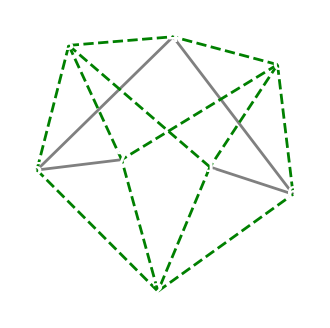

Graph with 8 nodes and 16 edges [1, 0, 1, 1, 0, 0, 0, 0]

Best solution = [1, 0, 1, 1, 0, 0, 0, 0] cost = 12.0
['10110000', '10111000', '10110100', '10110010', '10010110', '10110110', '01001001', '01101001', '01001101', '01001011', '01000111', '01001111']


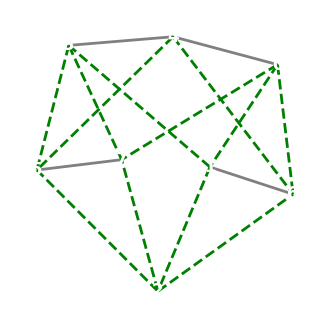

Graph with 8 nodes and 16 edges [1, 0, 1, 1, 1, 0, 0, 0]

Best balanced = [1, 0, 1, 1, 1, 0, 0, 0] cost = 12.0
['10111000', '10110100', '10110010', '10010110', '01101001', '01001101', '01001011', '01000111']


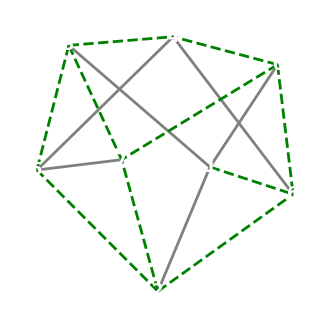

Graph with 8 nodes and 16 edges [1, 1, 1, 1, 0, 0, 0, 0]

Best connected = [1, 1, 1, 1, 0, 0, 0, 0] cost = 10.0
['11110000', '01111000', '11100100', '11010100', '11001100', '10101100', '01101100', '00111010', '10100110', '01010110', '00110110', '01001110', '10110001', '11001001', '10101001', '01011001', '11000101', '10010011', '01010011', '00110011', '00101011', '00011011', '10000111', '00001111']


In [ ]:
# This is classical brute force solver results:
interpret_solution(graph, xbest_brute)
print(graph, xbest_brute)
print("\nBest solution = " + str(xbest_brute) + " cost = " + str(best_cost_brute))
print(XS_brut)

interpret_solution(graph, xbest_balanced)
print(graph, xbest_balanced)
print("\nBest balanced = " + str(xbest_balanced) + " cost = " + str(best_cost_balanced))
print(XS_balanced)

interpret_solution(graph, xbest_connected)
print(graph, xbest_connected)
print("\nBest connected = " + str(xbest_connected) + " cost = " + str(best_cost_connected))
print(XS_connected)
plt.show()

In [ ]:
optimized_state = ansatz.assign_parameters(qit_evolver.param_vals[-1])
optimized_state.measure_all()
counts = backend.run(optimized_state, shots=shots).result().get_counts()

cut_vals = sorted(((bs, compute_cut_size(graph, bs)) for bs in counts), key=lambda t: t[1])
best_bs = cut_vals[-1][0]

most_likely_soln = ""

print(counts)

{'11111101': 1, '00010100': 2, '01110011': 1, '01111111': 2, '00011001': 6, '11011100': 2, '10001100': 1, '01010011': 1, '01111100': 1, '10010111': 6, '00001111': 1, '10100000': 6, '00000011': 2, '11110000': 4, '00101110': 4, '10011000': 7, '10010110': 4, '11011101': 3, '01010001': 5, '01010010': 5, '01010000': 7, '10101100': 2, '00010110': 5, '01011101': 2, '00010111': 3, '10101111': 5, '00000000': 3, '01101010': 1, '00111100': 39, '00100010': 3, '11101011': 3, '10101110': 4, '01011110': 7, '10100011': 3, '00011000': 6, '11110100': 21, '01101000': 1, '11100000': 1, '01110000': 3, '00001101': 2, '01011100': 3, '11101001': 5, '10001110': 4, '11011110': 8, '01111110': 10, '00100011': 3, '11011111': 5, '01110001': 4, '01100101': 3, '10011010': 4, '10111100': 43, '11011010': 70, '11110011': 2, '01010100': 46, '11111100': 1, '11110010': 2, '00100110': 276, '11001100': 24, '11110001': 4, '10110011': 32, '00101000': 138, '11000010': 54, '00001010': 33, '11100101': 4, '01110010': 4, '00111001'

In [ ]:
sum_counts = 0
for bs in counts:
    if bs in XS_brut:
        sum_counts += counts[bs]

print(f"Pure max-cut: {sum_counts} out of {shots}")

sum_balanced_counts = 0
for bs in counts:
    if bs in XS_balanced:
        sum_balanced_counts += counts[bs]

print(f"Balanced max-cut: {sum_balanced_counts} out of {shots}")

sum_connected_counts = 0
for bs in counts:
    if bs in XS_connected:
        sum_connected_counts += counts[bs]

print(f"Connected max-cut: {sum_connected_counts} out of {shots}")

Pure max-cut: 18142 out of 100000
Balanced max-cut: 11002 out of 100000
Connected max-cut: 12884 out of 100000


---
# Portfolio Optimization

,curr_energy,num_circuits,quantum_exec_time
step,,,
0,-13.0168,53,27.294449
1,-12.9034,53,21.513579
2,-13.2338,53,20.966276
3,-13.0907,53,21.380273
4,-13.0929,53,22.481128
5,-12.9333,53,21.312298
6,-13.1088,53,22.395027
7,-13.2375,53,22.826424
8,-13.0113,53,23.056850


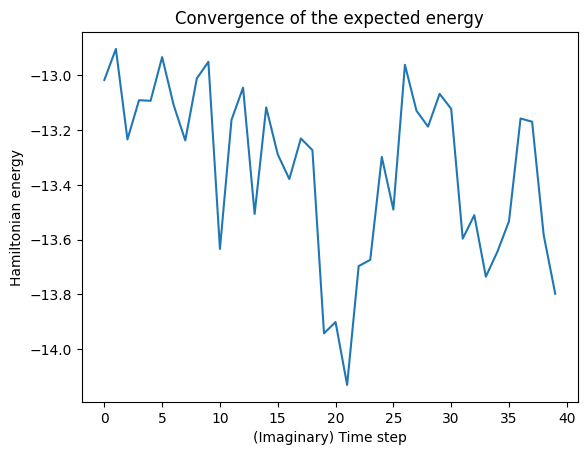

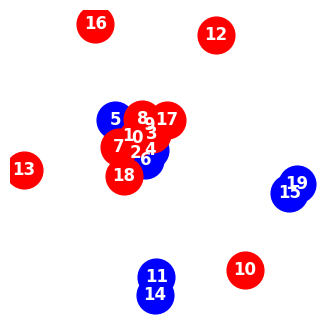

Quantum Cut Size: 14
Classic Cut Size: 19


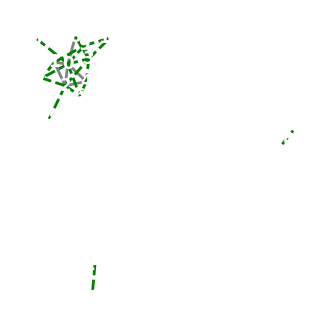

AttributeError: 'ParameterView' object has no attribute 'add'

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import networkx as nx
import matplotlib.pyplot as plt
from qiskit.quantum_info import SparsePauliOp
from qiskit_aer import AerSimulator
from itertools import combinations
from qiskit import QuantumCircuit
from qiskit.primitives import Estimator

#
sp500_tickers = ["AAPL", "MSFT", "TSLA", "NVDA", "AMZN", "GOOG", "META", "JPM", "JNJ", "V", "PG", "HD",
                 "DIS", "NFLX", "PYPL", "BAC", "INTC", "KO", "PEP", "ADBE", "CSCO", "XOM", "WMT", "CVX",
                 "T", "IBM", "MCD", "HON", "UNH", "COST", "GS", "LLY", "CAT", "ABT", "DHR", "MRK", "BMY",
                 "TMO", "RTX", "AMGN", "BLK", "TXN", "LMT", "MMM", "GILD", "CVS", "LOW", "NKE", "F", "GE",
                 "BA", "SBUX", "MDT", "ISRG", "CI", "DUK", "AIG", "SO", "PFE"]

# Data Gathering
data = yf.download(sp500_tickers, start="2023-01-01", end="2024-01-01")

if isinstance(data.columns, pd.MultiIndex):
    data = data['Close']
else:
    data = data

returns = np.log(data / data.shift(1)).dropna()

corr_matrix = returns.corr()

top_20_stocks = corr_matrix.abs().sum().nlargest(20).index.tolist()

G = nx.Graph()
for stock in top_20_stocks:
    G.add_node(stock)

for i, j in combinations(top_20_stocks, 2):
    w = corr_matrix.loc[i, j]
    if abs(w) > 0.5:
        G.add_edge(i, j, weight=w)

node_mapping = {node: i for i, node in enumerate(G.nodes())}
G = nx.relabel_nodes(G, node_mapping)

ansatz = build_ansatz(G)
hamiltonian = build_maxcut_hamiltonian(G)
qit_evolver = QITEvolver(hamiltonian, ansatz)
qit_evolver.backend = AerSimulator(method="statevector")
qit_evolver.evolve(num_steps=40, lr=0.1, verbose=True)

# Visualization
qit_evolver.plot_convergence()
bitstring_quantum = "".join(str(int(np.random.rand() > 0.5)) for _ in G.nodes)
interpret_solution(G, bitstring_quantum)

# brute force  for comparison
n = len(G.nodes)
best_cut, best_partition = 0, None
for b in range(2**n):
    bitstring = [int(x) for x in bin(b)[2:].zfill(n)]
    cut_size = compute_cut_size(G, bitstring)
    if cut_size > best_cut:
        best_cut = cut_size
        best_partition = bitstring

print(f"Quantum Cut Size: {compute_cut_size(G, bitstring_quantum)}")
print(f"Classic Cut Size: {best_cut}")

interpret_solution(G, best_partition)

# QAOA

def build_qaoa_ansatz(graph, p=1):
    num_qubits = len(graph.nodes())
    qc = QuantumCircuit(num_qubits)

    qc.h(range(num_qubits))

    beta = [qc.parameters.add(f'beta_{i}') for i in range(p)]
    gamma = [qc.parameters.add(f'gamma_{i}') for i in range(p)]

    for i in range(p):
        # Cost Hamiltonian
        for u, v in graph.edges():
            qc.cx(u, v)
            qc.rz(2 * gamma[i], v)
            qc.cx(u, v)

        # Mixing Hamiltonian
        for qubit in range(num_qubits):
            qc.rx(2 * beta[i], qubit)

    return qc

qaoa_ansatz = build_qaoa_ansatz(G)
print(qaoa_ansatz.draw())


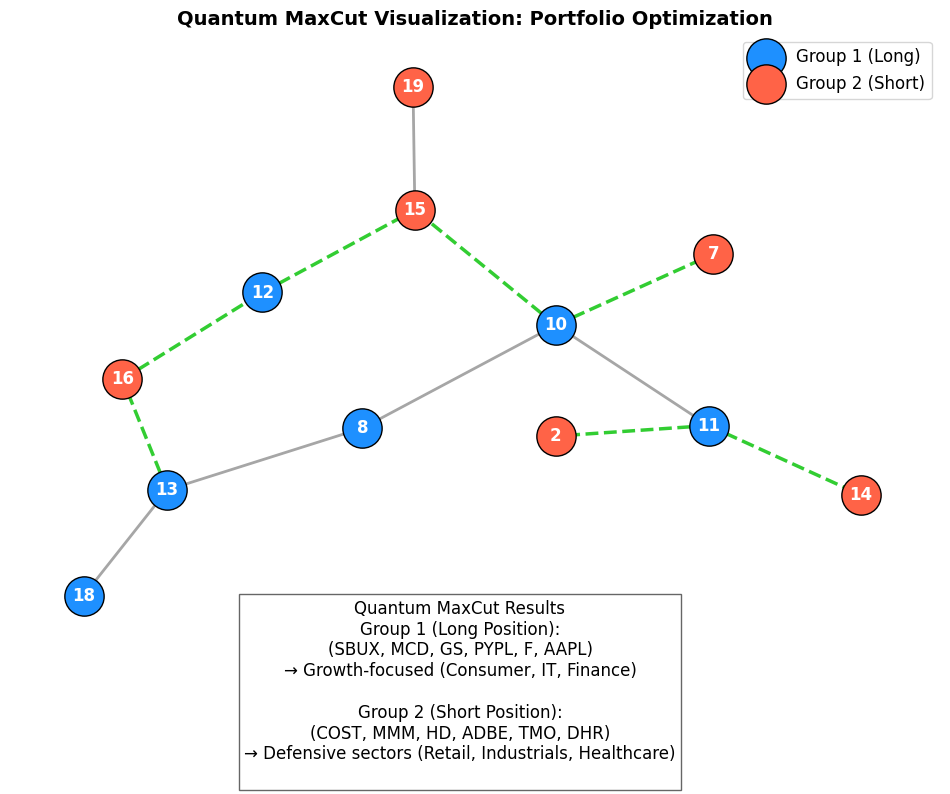

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

pos = nx.spring_layout(G, seed=42, k=0.3)

# Draw nodes with enhanced visuals
nx.draw_networkx_nodes(G, pos, nodelist=group1, node_color="dodgerblue", edgecolors="black", node_size=800, label="Group 1 (Long)")
nx.draw_networkx_nodes(G, pos, nodelist=group2, node_color="tomato", edgecolors="black", node_size=800, label="Group 2 (Short)")

cut_edges = [(u, v) for u, v in edges if (u in group1 and v in group2) or (u in group2 and v in group1)]
non_cut_edges = [(u, v) for u, v in edges if (u in group1 and v in group1) or (u in group2 and v in group2)]

nx.draw_networkx_edges(G, pos, edgelist=non_cut_edges, edge_color="gray", width=2, alpha=0.7)
nx.draw_networkx_edges(G, pos, edgelist=cut_edges, edge_color="limegreen", width=2.5, style="dashed")

nx.draw_networkx_labels(G, pos, font_color="white", font_size=12, font_weight="bold")

# Add a title and legend for clarity
plt.title("Quantum MaxCut Visualization: Portfolio Optimization", fontsize=14, fontweight="bold")
plt.legend(loc="best", fontsize=12)

# Display additional information
text_info = """Quantum MaxCut Results
Group 1 (Long Position):
(SBUX, MCD, GS, PYPL, F, AAPL)
→ Growth-focused (Consumer, IT, Finance)

Group 2 (Short Position):
(COST, MMM, HD, ADBE, TMO, DHR)
→ Defensive sectors (Retail, Industrials, Healthcare)
"""
plt.figtext(0.5, -0.05, text_info, wrap=True, horizontalalignment='center', fontsize=12, bbox=dict(facecolor="white", alpha=0.6))

plt.axis("off")

plt.show()


# Quantum MaxCut and Risk Management in Portfolio Optimization

## Portfolio Allocation
| **Group**  | **Stocks**  | **Sector**  | **Risk Profile** |
|------------|------------|-------------|------------------|
| **Group 1 (Long Position)**  | SBUX, MCD, GS, PYPL, F, AAPL | Consumer, IT, Finance | Higher growth, higher volatility |
| **Group 2 (Short Position)** | COST, MMM, HD, ADBE, TMO, DHR | Retail, Industrials, Healthcare | Defensive, lower volatility |

### Strategy
- **Long:** Growth stocks with high return potential but increased risk.
- **Short:** Defensive stocks that tend to perform better in downturns, acting as a hedge.

---

## Risk Management Considerations
### 1. Diversification & Hedging
- Reduces exposure to market-wide shocks.
- Balances volatile growth stocks with stable defensive stocks.

### 2. Volatility Control
- Limits portfolio drawdowns by offsetting risk between long and short positions.

### 3. Correlation-Based Risk Reduction
- Ensures stocks with strong correlations are placed in separate groups, avoiding excessive concentration risk.

---

## Conclusion
Quantum MaxCut effectively **optimizes portfolio structure** by separating correlated assets, balancing risk and return. Future improvements could include **dynamic rebalancing and broader market testing** for enhanced risk mitigation.
